#  Sentiment Analysis

El objetivo de este notebook es de realizar un analisis comparativo entre lo dicho en el programa y declaraciones hechas en twitter. De esta forma se podra catalogar las frases dichas por algunos de los personajes en función de la connotación positiva o negativa y si en funcion del medio cambian su percepcion o no.

In [1]:
import requests
import pandas as pd

#regex
import re

#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

### twitter 

#### 1.Importacion de datos de la API 

In [2]:
all_aut = requests.get("http://127.0.0.1:5000/twitter")
all_aut.status_code

200

In [3]:
datat = all_aut.json()

In [4]:
dft = pd.DataFrame(datat)

In [5]:
dft[:3]

,_id,name,tweet
0,{'$oid': '6033439293462e5d1db84d92'},Valentin,"No tengo ni idea de marchas o pasos, pero esto..."
1,{'$oid': '603348cfc443c4de3b6a4979'},Valentin,Tendríamos que competir con países cuya indust...
2,{'$oid': '6033494520e299f73f9e5c06'},Valentin,Cosa aparte es que podamos (Y debamos) potenci...


In [6]:
dft.drop(['_id'], axis = 1 , inplace = True)

In [7]:
dft[:3]

,name,tweet
0,Valentin,"No tengo ni idea de marchas o pasos, pero esto..."
1,Valentin,Tendríamos que competir con países cuya indust...
2,Valentin,Cosa aparte es que podamos (Y debamos) potenci...


#### 2."Tokenizacion"

In [8]:
#Donwload tokenizer from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeancharlesyamada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

tokeniza solo la primera celda 

In [9]:
# este proceso permite separar cada palabra y encapsularlo en una lista contenida en una celda
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(dft.iloc[0]['tweet'])
tokens

['No',
 'tengo',
 'ni',
 'idea',
 'de',
 'marchas',
 'o',
 'pasos',
 'pero',
 'esto',
 'me',
 'parece',
 'simplemente',
 'precioso',
 'y',
 'quiero',
 'vivirlo',
 'ya',
 'en',
 'persona']

In [10]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [11]:
dft['tweet'] = dft['tweet'].apply(tokenize)
dft.head()

,name,tweet
0,Valentin,"[No, tengo, ni, idea, de, marchas, o, pasos, p..."
1,Valentin,"[Tendríamos, que, competir, con, países, cuya,..."
2,Valentin,"[Cosa, aparte, es, que, podamos, Y, debamos, p..."
3,Valentin,"[Leo, estos, días, a, muchos, entre, ellos, a,..."
4,Valentin,"[Madrid, es, vida]"


In [12]:
dft['tweet'] = dft['tweet'].apply(lambda x: " ".join(x))
dft.head()

,name,tweet
0,Valentin,No tengo ni idea de marchas o pasos pero esto ...
1,Valentin,Tendríamos que competir con países cuya indust...
2,Valentin,Cosa aparte es que podamos Y debamos potenciar...
3,Valentin,Leo estos días a muchos entre ellos a Alejo Vi...
4,Valentin,Madrid es vida


#### 3.Traducion 

In [13]:
#Translating
spanish_string = TextBlob(u'españa es diferente')
english_blob=spanish_string.translate(from_lang='es',to='en')
english_blob

TextBlob("Spain is different")

In [14]:
def intoEnglish(string):
    spanish_string = TextBlob(string)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return string

In [15]:
dft['tweet'] = dft.tweet.apply(intoEnglish)

In [16]:
dft.head()

,name,tweet
0,Valentin,I have no idea of ​​marches or steps but this ...
1,Valentin,We would have to compete with countries whose ...
2,Valentin,A separate thing is that we can AND we should ...
3,Valentin,"I read these days many, including Alejo Vidal ..."
4,Valentin,Madrid is life


#### 4. "Stopwords" Discriminacion de palabras 
descartamo palabras como articulos o conectores


In [17]:
#stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeancharlesyamada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'myself', 'again', 'are', 'below', 'its', 'on', 'those', 'few', "that'll", 'does', 'him', 'after', 'haven', 'wasn', 'ours', 'be', 'both', 'an', "should've", 'who', "needn't", "wouldn't", 'my', 'how', 's', 'further', 'weren', 'above', 'theirs', 'just', 'needn', 'he', 'shan', 'when', 'while', 'own', "shan't", 'most', 'do', 'couldn', 'did', 'isn', "you'll", 'was', "you've", "couldn't", 'hers', 'other', 'but', "don't", 'they', 'before', 'we', 'yourself', 'it', 'ourselves', 'am', 'of', 'being', 'once', "it's", 'to', "you're", 'whom', 'herself', 'doing', 'under', 'what', "mustn't", 'into', 'had', 'if', 'itself', 'here', 'why', 'mightn', 'a', "doesn't", "isn't", 'nor', 'than', 'having', 'through', 'no', "she's", 'more', 'themselves', 'll', 'against', 'his', 'each', 'so', "won't", 'o', 'there', 'from', 'now', 'as', 'for', 'were', 'doesn', 'off', 'should', 'you', 'can', "wasn't", 'd', 'only', 'she', 'some', 'wouldn', 'because', 'yourselves', 'their', 'and', 'such', 'same', 'y', 't', "aren't", 

In [19]:
dft.tweet = dft.tweet.apply(lambda x: x.split(" "))

In [20]:
dft.head()

,name,tweet
0,Valentin,"[I, have, no, idea, of, ​​marches, or, steps, ..."
1,Valentin,"[We, would, have, to, compete, with, countries..."
2,Valentin,"[A, separate, thing, is, that, we, can, AND, w..."
3,Valentin,"[I, read, these, days, many,, including, Alejo..."
4,Valentin,"[Madrid, is, life]"


In [21]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [22]:
dft.tweet = dft.tweet.apply(stop_words)
dft.head()

,name,tweet
0,Valentin,I idea ​​marches steps seems simply beautiful ...
1,Valentin,We would compete countries whose industry full...
2,Valentin,A separate thing AND enhance innovation streng...
3,Valentin,"I read days many, including Alejo Vidal Quadra..."
4,Valentin,Madrid life


#### 5. Analisi del sentimiento

uso de Textblob

In [23]:
#ejemplo
the_string = "i hate it here"
blob = TextBlob(the_string)
blob.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

#####  NLTK

In [24]:
#activamos vader_lexicon
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeancharlesyamada/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

ejemplo de uso 

In [25]:
sia = SentimentIntensityAnalyzer()
sentence = "this is not beautiful"
polarity = sia.polarity_scores(sentence)
polarity

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.4847}

In [26]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [27]:
sentimentAnalysis(sentence)


-0.4847

In [28]:
dft['twitter_sentiment'] = dft.tweet.apply(sentimentAnalysis)
dft.head()

,name,tweet,twitter_sentiment
0,Valentin,I idea ​​marches steps seems simply beautiful ...,0.6369
1,Valentin,We would compete countries whose industry full...,0.0772
2,Valentin,A separate thing AND enhance innovation streng...,0.8360
3,Valentin,"I read days many, including Alejo Vidal Quadra...",0.0258
4,Valentin,Madrid life,0.0000


In [29]:
dft.name.value_counts()

Valentin                   9
Samantha Vallejo-Nagera    7
Jordi Cruz                 6
Henar                      5
Pepe Rodriguez             3
Josie                      3
Jeancha                    1
Name: name, dtype: int64

In [31]:
resumen = dft.groupby(['name'])['twitter_sentiment'].mean().sort_values()
resumen

name
Samantha Vallejo-Nagera    0.161600
Valentin                   0.226833
Josie                      0.245033
Henar                      0.361880
Jordi Cruz                 0.601767
Jeancha                    0.680800
Pepe Rodriguez             0.734433
Name: twitter_sentiment, dtype: float64

<AxesSubplot:xlabel='name'>

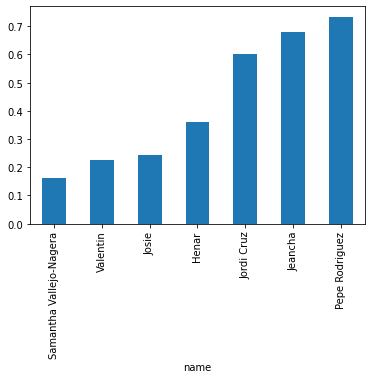

In [50]:
resumen.plot(kind="bar")

### Frases dichas en Masterchef 

#### 1.Importacion de datos de la API 

In [33]:
all_aut = requests.get("http://127.0.0.1:5000/masterchef")
all_aut.status_code

200

In [34]:
datam = all_aut.json()
dfm = pd.DataFrame(datam)
dfm[:3]

,_id,name,phrase,season,chapter
0,{'$oid': '6031ccdcf1264eede86ab56d'},Josie,¿Cómo te crees que he llegado a los 40 con la ...,MasterChef Celebrity 5,3
1,{'$oid': '6032a2ca32a36432b38f263d'},Osiris,Mira que rico el chocolate negro mami,MasterChef 7,4
2,{'$oid': '6032a3a132a36432b38f263e'},Josie,"Me impone la salchicha, si te digo la verdad",MasterChef Celebrity 5,3


In [35]:
dfm.drop(['_id'], axis = 1 , inplace = True)
dfm[:3]

,name,phrase,season,chapter
0,Josie,¿Cómo te crees que he llegado a los 40 con la ...,MasterChef Celebrity 5,3
1,Osiris,Mira que rico el chocolate negro mami,MasterChef 7,4
2,Josie,"Me impone la salchicha, si te digo la verdad",MasterChef Celebrity 5,3


#### 2."Tokenizacion"

In [36]:
dfm['phrase'] = dfm['phrase'].apply(tokenize)
dfm[:3]

,name,phrase,season,chapter
0,Josie,"[Cómo, te, crees, que, he, llegado, a, los, 40...",MasterChef Celebrity 5,3
1,Osiris,"[Mira, que, rico, el, chocolate, negro, mami]",MasterChef 7,4
2,Josie,"[Me, impone, la, salchicha, si, te, digo, la, ...",MasterChef Celebrity 5,3


In [37]:
dfm['phrase'] = dfm['phrase'].apply(lambda x: " ".join(x))
dfm[:3]

,name,phrase,season,chapter
0,Josie,Cómo te crees que he llegado a los 40 con la c...,MasterChef Celebrity 5,3
1,Osiris,Mira que rico el chocolate negro mami,MasterChef 7,4
2,Josie,Me impone la salchicha si te digo la verdad,MasterChef Celebrity 5,3


#### 3.Traducion 

In [38]:
dfm['phrase'] = dfm.phrase.apply(intoEnglish)
dfm[:3]

,name,phrase,season,chapter
0,Josie,How do you think I have reached 40 with Elizab...,MasterChef Celebrity 5,3
1,Osiris,Look how rich the dark chocolate mommy,MasterChef 7,4
2,Josie,Impose the sausage if I tell you the truth,MasterChef Celebrity 5,3


#### 4. "Stopwords" Discriminacion de palabras 

In [39]:
dfm.phrase = dfm.phrase.apply(lambda x: x.split(" "))
dfm[:3]

,name,phrase,season,chapter
0,Josie,"[How, do, you, think, I, have, reached, 40, wi...",MasterChef Celebrity 5,3
1,Osiris,"[Look, how, rich, the, dark, chocolate, mommy]",MasterChef 7,4
2,Josie,"[Impose, the, sausage, if, I, tell, you, the, ...",MasterChef Celebrity 5,3


In [40]:
dfm.phrase = dfm.phrase.apply(stop_words)
dfm[:3]

,name,phrase,season,chapter
0,Josie,How think I reached 40 Elizabeth Taylor's waist,MasterChef Celebrity 5,3
1,Osiris,Look rich dark chocolate mommy,MasterChef 7,4
2,Josie,Impose sausage I tell truth,MasterChef Celebrity 5,3


#### 5. Analisi del sentimiento

In [41]:
dfm['Masterchef_sentiment'] = dfm.phrase.apply(sentimentAnalysis)
dfm[:3]

,name,phrase,season,chapter,Masterchef_sentiment
0,Josie,How think I reached 40 Elizabeth Taylor's waist,MasterChef Celebrity 5,3,0.1027
1,Osiris,Look rich dark chocolate mommy,MasterChef 7,4,0.5574
2,Josie,Impose sausage I tell truth,MasterChef Celebrity 5,3,0.0258


In [ ]:
dfm.name.value_counts()

In [42]:
resumenm = dfm.groupby(['name'])['Masterchef_sentiment'].mean().sort_values()
resumenm

name
Samira                    -0.771700
Carlos                    -0.542300
Golria                    -0.051600
Aleix                      0.000000
Valentin                   0.000000
Josie                      0.069957
Aitana                     0.148260
Pepe Rodriguez             0.217975
Henar                      0.226825
Samantha Vallejo-Nagera    0.320467
Jeancha                    0.356450
Jordi Cruz                 0.412467
Natalia                    0.557400
Osiris                     0.557400
Name: Masterchef_sentiment, dtype: float64

<AxesSubplot:xlabel='name'>

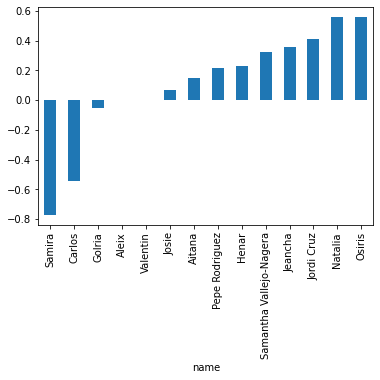

In [43]:
resumenm.plot(kind="bar")

In [44]:
analisis_tuitter = pd.DataFrame(resumen)
analisis_tuitter

,twitter_sentiment
name,
Samantha Vallejo-Nagera,0.161600
Valentin,0.226833
Josie,0.245033
Henar,0.361880
Jordi Cruz,0.601767
Jeancha,0.680800
Pepe Rodriguez,0.734433


In [46]:
analisis_programas = pd.DataFrame(resumenm)
analisis_programas

,Masterchef_sentiment
name,
Samira,-0.771700
Carlos,-0.542300
Golria,-0.051600
Aleix,0.000000
Valentin,0.000000
Josie,0.069957
Aitana,0.148260
Pepe Rodriguez,0.217975
Henar,0.226825


In [48]:
alanisis = pd.concat([analisis_tuitter,analisis_programas],axis=1)
alanisis

,twitter_sentiment,Masterchef_sentiment
name,,
Samantha Vallejo-Nagera,0.161600,0.320467
Valentin,0.226833,0.000000
Josie,0.245033,0.069957
Henar,0.361880,0.226825
Jordi Cruz,0.601767,0.412467
Jeancha,0.680800,0.356450
Pepe Rodriguez,0.734433,0.217975
Samira,NaN,-0.771700
Carlos,NaN,-0.542300
